# 1.0 Load libraries and modules
Make sure the Python environment is properly setup and that all of the required modules load correctly.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.plotly as py
import plotly.figure_factory as ff
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter, Figure, Layout

init_notebook_mode(connected=True)

In [ ]:
#Load the data
fips = [27000+i for i in range(1,174,2)]
#print(fips)
pop = [np.random.randint(1,100) for i in range(0,len(fips))]
#print(pop)
prevalance = np.random.normal(size=100)

# 2.0 Load Data
Load the patient and observations (labs) data from the .csv file that we received from the extract.  Convert dates and other fields to the proper format when reading the file.

Displaying the first 5 rows of the data is a good way to look for obvious issues before working with the data in more detail.

In [47]:
patients = pd.read_csv('/home/jovyan/work/data/synthea/patients.csv', index_col=0, header=0, parse_dates=[1,2])
observations = pd.read_csv('/home/jovyan/work/data/synthea/observations.csv', index_col=2, header=0, parse_dates=[0])
patients.head(5)

,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS
ID,,,,,,,,,,,,,,,,
545be6f8-8796-496a-ac87-9919542f724e,2004-02-18,NaT,999-22-9579,NaN,NaN,NaN,Noble66,Hintz995,NaN,NaN,NaN,white,french,M,Dell Groveship,740 Schmidt Heights Apt 24 Apple Valley Minnes...
7e354bf5-99c6-413d-b37c-b779dd103583,1996-05-28,NaT,999-93-9114,S99976555,X29508953X,Mr.,Colin861,Barrows492,NaN,NaN,NaN,white,polish,M,St. Louis Park,724 Anderson Route Apt 49 Dovership Minnesota US
f86ec82d-004a-46df-8cdb-4226abd6886d,2014-11-07,NaT,999-84-5231,NaN,NaN,NaN,Ashley34,Becker968,NaN,NaN,NaN,white,german,F,Huntership,775 Prosacco Ville Minneapolis Minnesota 55401 US
556e6a09-12c0-40fc-8f68-9989df047485,1959-10-29,2004-10-21,999-79-5940,S99947417,X40810024X,Mr.,Randolph418,Runolfsson901,NaN,NaN,M,white,greek,M,St. Cloud,577 Prohaska Drive Unit 73 Lino Lakes Minnesot...
58ec9442-891c-4855-9008-3e8d700eb5b8,2004-06-03,NaT,999-48-8276,NaN,NaN,NaN,Lili474,Johns824,NaN,NaN,NaN,white,german,F,Bloomington,303 Mertz Esplanade Edina Minnesota 55343 US


# 3.0 Exploratory Data Analysis

Use the power of Matplotlib, Seaborn and Plotly to easily explore the data through rich visualizations including graphs, distributions and maps of the data.

The graphs are interactive through hovering and selecting of elements.  The graphic can be exported to be included in other documents.

In [48]:
values = pop
endpts = list(np.mgrid[min(values):max(values):4j])

colorscale = ["#030512","#1d1d3b","#323268","#3d4b94","#3e6ab0",
              "#4989bc","#60a7c7","#85c5d3","#b7e0e4","#eafcfd"]  # Blues
colorscale = [
    'rgb(68.0, 1.0, 84.0)',
    'rgb(66.0, 64.0, 134.0)',
    'rgb(38.0, 130.0, 142.0)',
    'rgb(63.0, 188.0, 115.0)',
    'rgb(216.0, 226.0, 25.0)'
]  # Green / Yellow

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['Minnesota'], show_state_data=True,
    colorscale=colorscale, 
    binning_endpoints=endpts, 
    round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='Prevalance by County',
    county_outline={'color': 'rgb(0,0,0)', 'width': 0.5},
    state_outline={'color': 'rgb(0,0,0)', 'width': 1},
    exponent_format=True,
)

iplot(fig, filename='choropleth_MN')

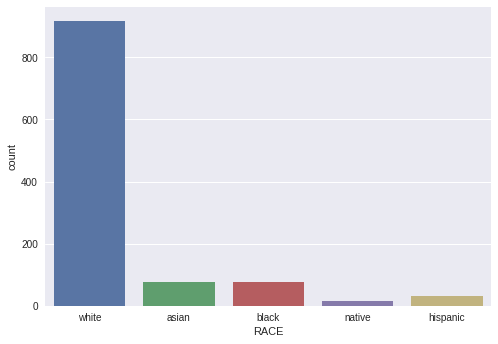

In [44]:
sns.countplot(x='RACE', data=patients)

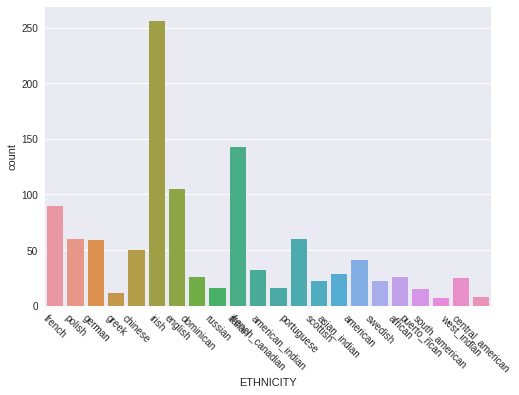

In [45]:
g = sns.countplot(x='ETHNICITY', data=patients)
z = plt.xticks(rotation=-45)

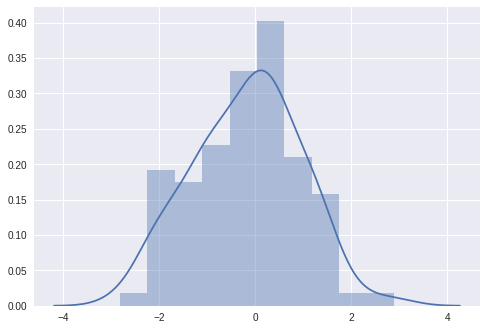

In [46]:
sns.distplot(prevalance)

# 3.0 Transform the Data

Use the power of Pandas Dataframes to transform the data.  Add new columns as calculations from existing columns, join the data together and get it into the format you need for analysis.

In [ ]:
obs = pd.merge(observations, patients, left_on='PATIENT', how='left', right_index=True, indicator=True)
obs['age_at_visit'] = round((pd.to_datetime(obs['DATE']) - pd.to_datetime(obs['BIRTHDATE'])).dt.days/365)
obs['adult'] = np.where(obs['age_at_visit'] >= 18, True, False)
#obs[obs['adult']].head(5)

Number of patients: 10,506
Avg weight:  71.1310965163


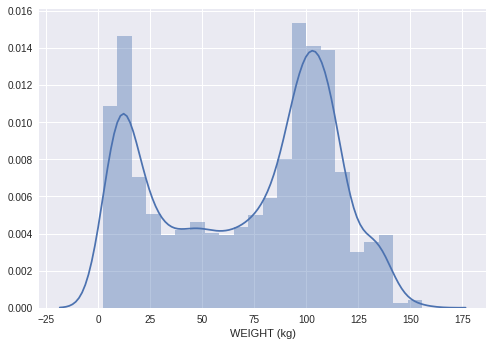

In [43]:
w = obs[obs['CODE']=='29463-7']
print('Number of patients: {:,}'.format(len(w)))
weights = w['VALUE'].astype(np.float)
mean = np.mean(weights)
print('Avg weight: ',mean)
sns.distplot(weights)
plt.xlabel("WEIGHT (kg)")
plt.show()

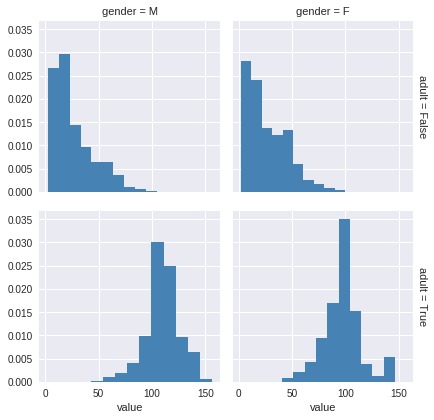

In [42]:
weight_obs = pd.DataFrame()
weight_obs['gender'] = obs['GENDER']
weight_obs['value'] = weights
weight_obs['adult'] = obs['adult']
sns.set(style="darkgrid")
g = sns.FacetGrid(weight_obs, row= 'adult', col='gender', margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, 'value', color="steelblue", lw=0, normed=True)